In [1]:
import sys

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
sys.path.append(str(Path("../src").absolute()))
sns.set_style("whitegrid")

# Linear Regression

For instance we have some data as red points and how to predict the y-coordinate of the blue points?

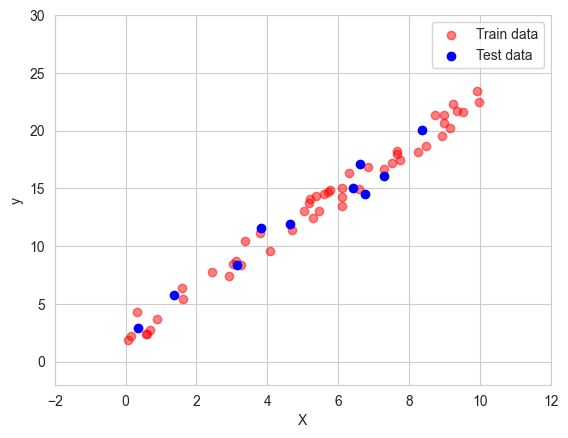

In [3]:
X_train = 10 * np.random.rand(50)
y_train = 2*X_train + 1 + (3*np.random.rand(X_train.shape[0]))

X_test = 10*np.random.rand(10)
y_test = 2*X_test + 1 + (3*np.random.rand(X_test.shape[0]))

fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.scatter(X_test, y_test, color="blue", label="Test data")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

## Model
Looks like the optimial prediction can be done using a line. Lets try to fit a line.
$f(x) = my + b$

In [4]:
from ml.models import LinearRegression

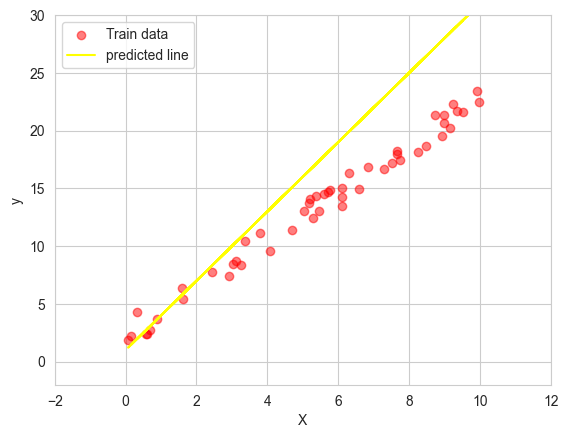

In [5]:
## Training phase (predicting on read points)
model = LinearRegression()

# Model predicted using the default m and b values.
model.forward(X_train, y_train)
y_pred = model.output

# Plot to how well it did.
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.plot(X_train, y_pred, color="yellow", label="predicted line")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

That's bad, we have to optimize the lines slope and intercept to better fit the give data. For that we need loss function and an optimizer.

## Root Mean Squared Error
Given by $f(m, b) = \sqrt{\frac{1}{n}\sum^{n}(y_i - \hat{y_i})^2}$
where $\hat{y_i}$ is the predicted value by the model, the model equation is given by $f(x) = mx + b$

In [6]:
from ml.losses import RootMeanSquaredError

In [7]:
loss_function = RootMeanSquaredError()
loss_function.calculate(y_train, y_pred)
print(loss_function.output)

4.828788303185031


Well that's bad the error is high, ideally the optimal model should output error close to 0 from positive side. So we need to find an optimizer for this.
## Optimizer gradient decent

epoch 0, loss: 4.828788303185031
epoch 1, loss: 1.341630764557341
epoch 2, loss: 1.992682907822631
epoch 3, loss: 1.9252100068056617
epoch 4, loss: 1.9591266347156067
epoch 5, loss: 1.9423768549976956
epoch 6, loss: 1.950885721174889
epoch 7, loss: 1.9466249960928879
epoch 8, loss: 1.9488514025921129
epoch 9, loss: 1.9477509632857344
epoch 10, loss: 1.9483661448548528
epoch 11, loss: 1.9480881397399963
epoch 12, loss: 1.9482764454071495
epoch 13, loss: 1.9482178715299305
epoch 14, loss: 1.9482891086618008
epoch 15, loss: 1.9482899755806369
epoch 16, loss: 1.9483275707042211
epoch 17, loss: 1.948344299435521
epoch 18, loss: 1.9483713660797906
epoch 19, loss: 1.948391815395978
epoch 20, loss: 1.9484149573470493
epoch 21, loss: 1.9484356969553358
epoch 22, loss: 1.9484568801252802
epoch 23, loss: 1.9484769510102353
epoch 24, loss: 1.9484968045532896
epoch 25, loss: 1.9485159630549358
epoch 26, loss: 1.9485347199104268
epoch 27, loss: 1.9485529320335127
epoch 28, loss: 1.9485707032652422
e

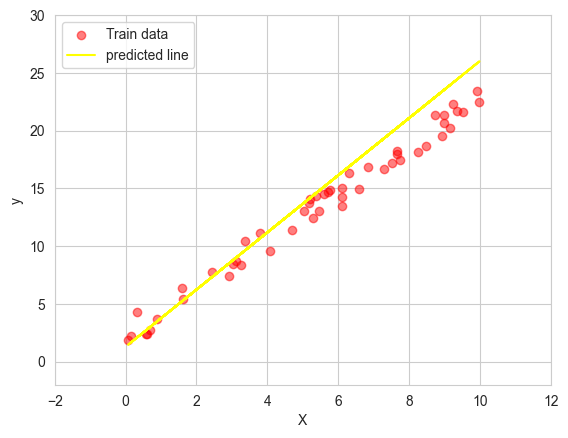

In [8]:
from ml.optimizers import GradientDecent

optimizer = GradientDecent(model=model)

epochs = 30
for epoch in range(epochs):
    # Forward
    model.forward(X_train, y_train)
    loss_function.calculate(y_train, model.output)
    
    print(f"epoch {epoch}, loss: {loss_function.output}")
    
    # Backward
    loss_function.backprop()
    model.backprop(loss_function.dinput)
    
    optimizer.update_params()

# Plot to how well it did.
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.plot(X_train, model.output, color="yellow", label="predicted line")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

That's an ok result, lets's test with mean-squared-error and hope for better fit.
## Mean Squared Error loss

Given by $f(m, b) = \frac{1}{n}\sum^{n}(y_i - \hat{y_i})^2$

In [9]:
from ml.commons import Model_LinearRegression_Loss_Mean_Squared_Error

model = Model_LinearRegression_Loss_Mean_Squared_Error()
optimizer = GradientDecent(model=model)

epochs = 30
for epoch in range(epochs):
    # Forward
    model.forward(X_train, y_train)
    
    print(f"epoch {epoch}, loss: {model.loss_function.output}")
    
    # Backward
    model.backprop()
    
    optimizer.update_params()

# Plot to how well it did.
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color="red",alpha=0.5, label="Train data")
ax.plot(X_train, model.model.output, color="yellow", label="predicted line")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 30)
ax.legend()

plt.show()

epoch 0, loss: 23.317196476976573


AttributeError: 'Model_LinearRegression_Loss_Mean_Squared_Error' object has no attribute 'm'